In [4]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

In [ ]:
library(lubridate)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)
library(dplyr)
library(readr)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Exercise 1 - Community Mobility Open Data

    Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/

    Download and analyze the following data sets:
    - https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
    - https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

    The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.

    To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:
    - retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums libraries, and movie theaters
    - grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies
    - parks, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens
    - transit stations i.e. all public transport hubs such as subway, bus, and train stations
    - workplaces, i.e. places of work
    - residential, i.e. people’s residence

    Select a couple of European countries of your choice and analyze the trends in the previous variables over time: produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility sitations.

In [ ]:
#Summarizing and grouping by using the mean value. The function will be used when loading the datasets
aggregator <- function(dataset){
    data = dataset %>% group_by(country_region, date) %>% summarise (retail = mean(retail_and_recreation_percent_change_from_baseline), 
                                                                      groceries = mean(grocery_and_pharmacy_percent_change_from_baseline), 
                                                                      parks = mean(parks_percent_change_from_baseline), 
                                                                      stations = mean(transit_stations_percent_change_from_baseline), 
                                                                      workplaces = mean(workplaces_percent_change_from_baseline),
                                                                      residential = mean(residential_percent_change_from_baseline))
    return(data)
}

In [ ]:
#Data loader function. Will be used for loading each dataset
data_loader <- function(country_code, time_granularity){
    cat("Succesffully loaded and joined the following files:\n")
    #Loads all the files of a region
    for (i in 2020:2022) {
        file_name <- paste0("G_mobility_rpts/",as.character(i), "_", country_code, "_Region_Mobility_Report.csv")
        cat(file_name, "\n")
        data = read_csv(file_name, col_types = cols())
        #Depending on the desired setting, uses lubridate with the correct time period.
        #It shifts the week/month count so that it is sequential across different years.
        #Only the data relative to the whole region are selected
        if (time_granularity == "week") {
            data = mutate(data, date = lubridate::week(date))
            data = data[is.na(data$sub_region_1) ,]
            data$date = data$date + 52 * (i - 2020)
        } else {
            data = mutate(data, date = lubridate::month(date))
            data = data[is.na(data$sub_region_1) ,]
            data$date = data$date + 12 * (i - 2020)
        }
        assign(paste0("data_", i), aggregator(data))
    }
    #Joins together the dataset of different years    
    cat("Time_granularity set as ", time_granularity, "\n\n")
    mobility <- rbind(data_2020, data_2021, data_2022)
    return(mobility)
}

In [ ]:
#Loads data of some european countries
italy_mobility <- data_loader(country_code = "IT", time_granularity = "week")
france_mobility <- data_loader(country_code = "FR", time_granularity = "week")
GB_mobility <- data_loader(country_code = "GB", time_granularity = "week")
germany_mobility <- data_loader(country_code = "DE", time_granularity = "week")
spain_mobility <- data_loader(country_code = "ES", time_granularity = "week")
#greece_mobility <- data_loader(country_code = "GR", time_granularity = "week")
#austria_mobility <- data_loader(country_code = "AT", time_granularity = "week")

Succesffully loaded and joined the following files:
G_mobility_rpts/2020_IT_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2021_IT_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2022_IT_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
Time_granularity set as  week 

Succesffully loaded and joined the following files:
G_mobility_rpts/2020_FR_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2021_FR_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2022_FR_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_re

In [ ]:
#Defines a plotting function, that will be used for each mobility class of the country dataset
plot_ <- function(time_granularity, category) {
    p <- ggplot() +
    geom_line(data = italy_mobility, aes(x = date, y = eval(parse(text = category)), color = "italy")) +
    geom_line(data = germany_mobility, aes(x = date, y = eval(parse(text = category)) , color = "germany")) +
    geom_line(data = GB_mobility, aes(x = date, y = eval(parse(text = category)) , color = "GB")) +
    #geom_line(data = austria_mobility, aes(x = date, y = eval(parse(text = category)) , color = "austria")) +
    geom_line(data = france_mobility, aes(x = date, y = eval(parse(text = category)) , color = "france")) +
    geom_line(data = spain_mobility, aes(x = date, y = eval(parse(text = category)) , color = "spain")) +
    #geom_line(data = greece_mobility, aes(x = date, y = eval(parse(text = category)) , color = "greece")) +
    theme_light(
        base_size = 11,
        base_family = "",
        ) +
    theme(
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        ) +
    labs(
        title = paste0(category, " community mobility"),
        subtitle = " ",
        x = time_granularity,
        y = "mobility",
        fill = "Title",
        caption = paste0("Values of ", category," community mobility wrt baseline"),
        color = "Countries"
        )
    return(p)
}


Plots with weekly averages. 

The graphs are as expected. From retails and stations, it is possible to distinguish the first covid wave and the winters at first sight. With workplaces this is less evident. 

As expected, grocery shops are the one with the most stable graph, they are in fact the only activity never object of limitations during the lockdown.

In parks, instead, beside the lockdwon of the first wave, it is difficult to prove an influence of the covid. For sure the summer peaks are also due to the nice weather

Correctly, the residential value has always the opposite trend of all the other ones. 

The peaks on the 52nd and 104th weeks, in groceries and retail, very probably correspond to the people buying Christmas presents.

Comparing the 5 countries, there is not much difference in the community mobilieties, except for Germany, where apparently the limitations (or the will of the people of respecting them) have been inferior.

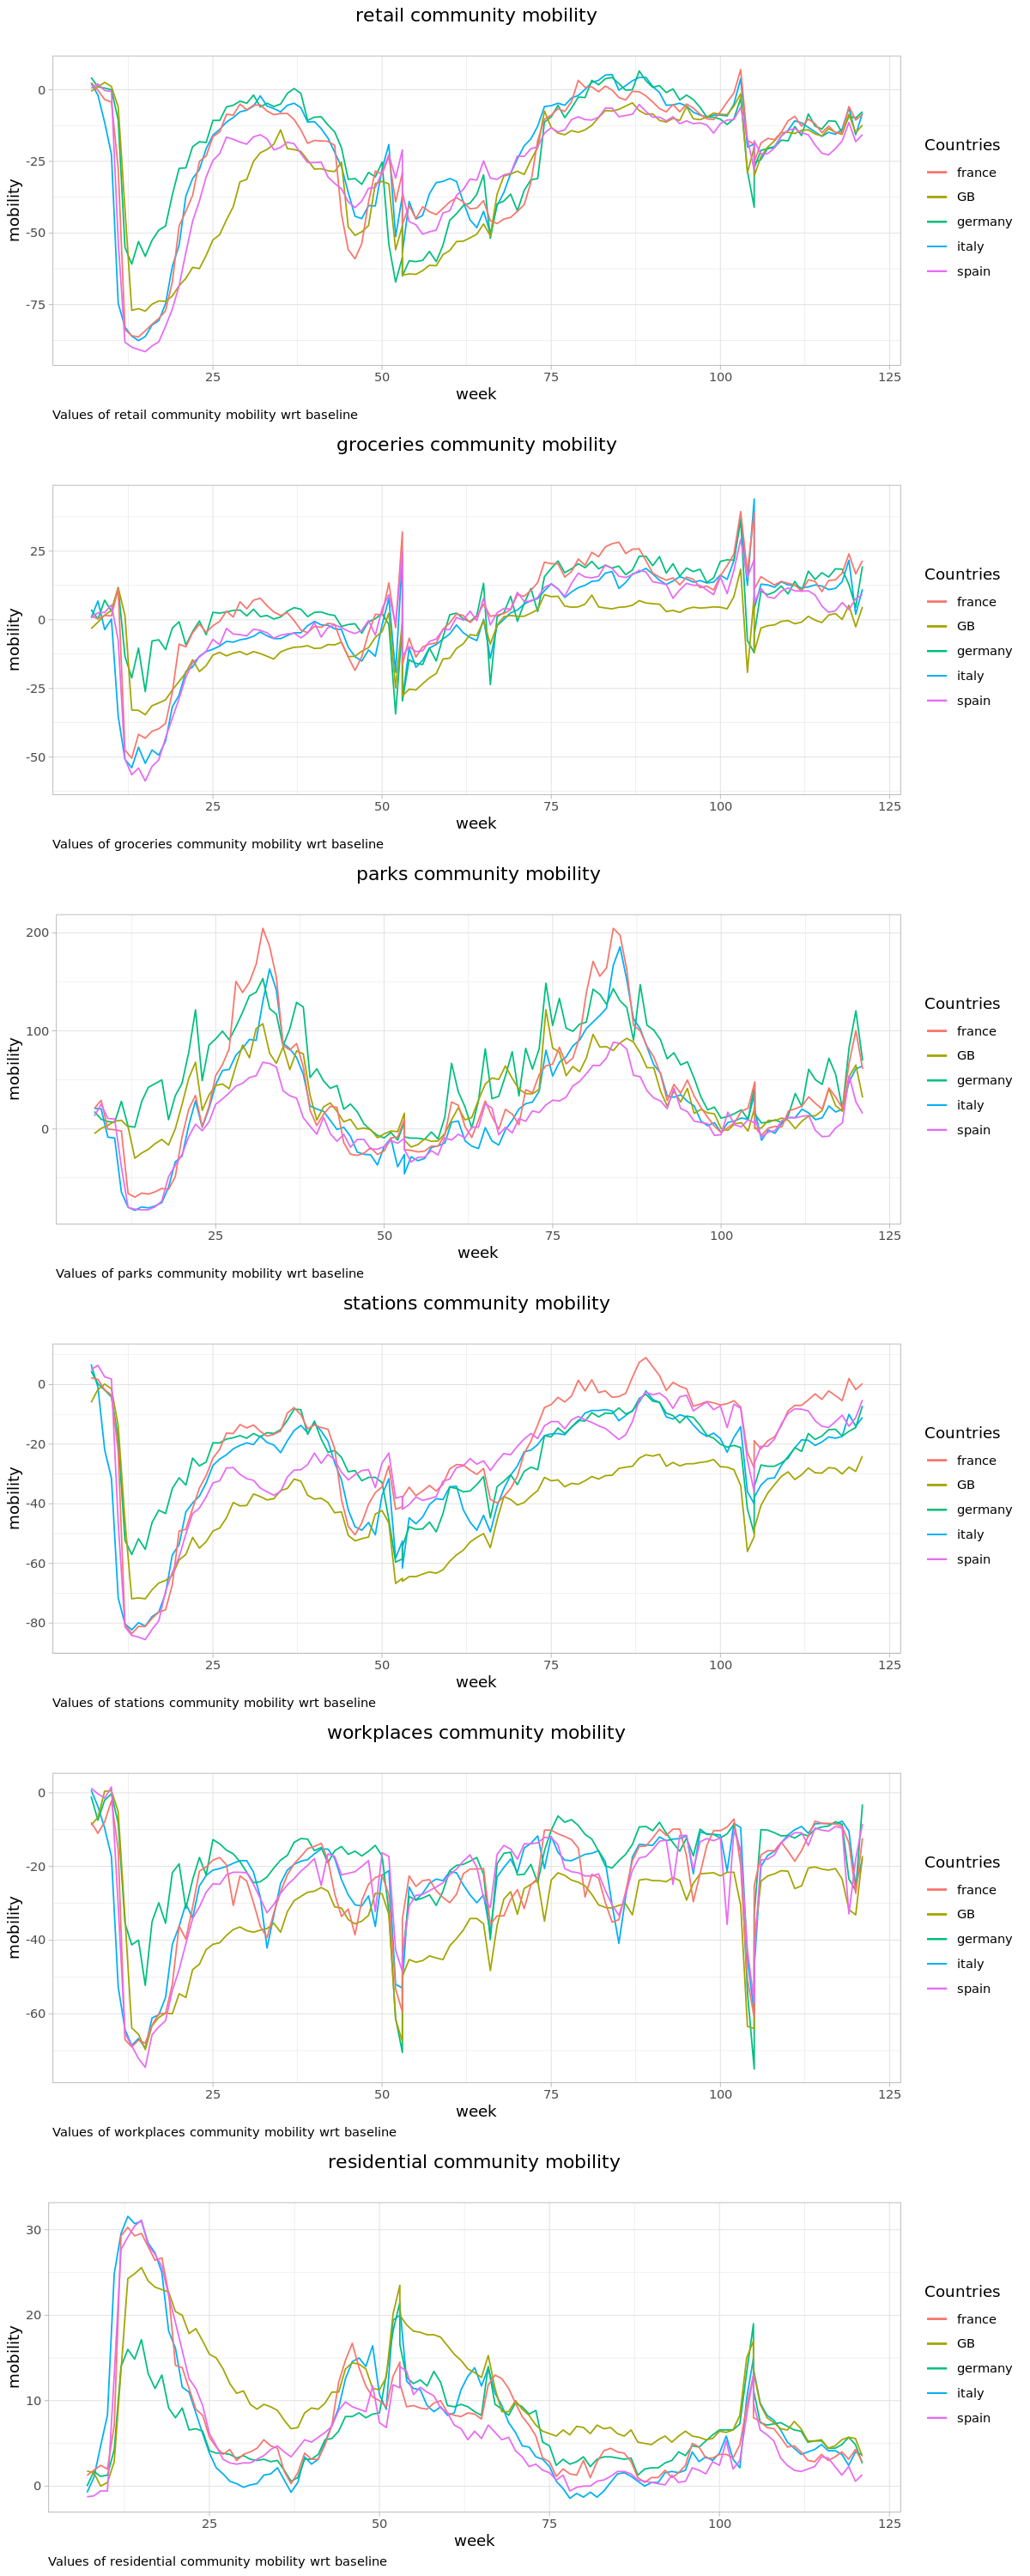

In [ ]:
fig(10,25)
retail_plot <- plot_(time_granularity = "week", category = "retail")
groceries_plot <- plot_(time_granularity = "week", category = "groceries")
parks_plot <- plot_(time_granularity = "week", category = "parks")
stations_plot <- plot_(time_granularity = "week", category = "stations")
workplaces_plot <- plot_(time_granularity = "week", category = "workplaces")
residential_plot <- plot_(time_granularity = "week", category = "residential")
grid.arrange(retail_plot, groceries_plot, parks_plot, stations_plot, workplaces_plot, residential_plot, ncol = 1, nrow = 6)


Plots with monthly averages. The same considerations as before hold, except for the event occurring in a very reduced amount of time.

In [ ]:
italy_mobility <- data_loader(country_code = "IT", time_granularity = "month")
france_mobility <- data_loader(country_code = "FR", time_granularity = "month")
GB_mobility <- data_loader(country_code = "GB", time_granularity = "month")
germany_mobility <- data_loader(country_code = "DE", time_granularity = "month")
spain_mobility <- data_loader(country_code = "ES", time_granularity = "month")
#greece_mobility <- data_loader(country_code = "GR", time_granularity = "month")
#austria_mobility <- data_loader(country_code = "AT", time_granularity = "month")

Succesffully loaded and joined the following files:
G_mobility_rpts/2020_IT_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2021_IT_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2022_IT_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
Time_granularity set as  month 

Succesffully loaded and joined the following files:
G_mobility_rpts/2020_FR_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2021_FR_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_region'. You can override using
the `.groups` argument.
G_mobility_rpts/2022_FR_Region_Mobility_Report.csv 
`summarise()` has grouped output by 'country_r

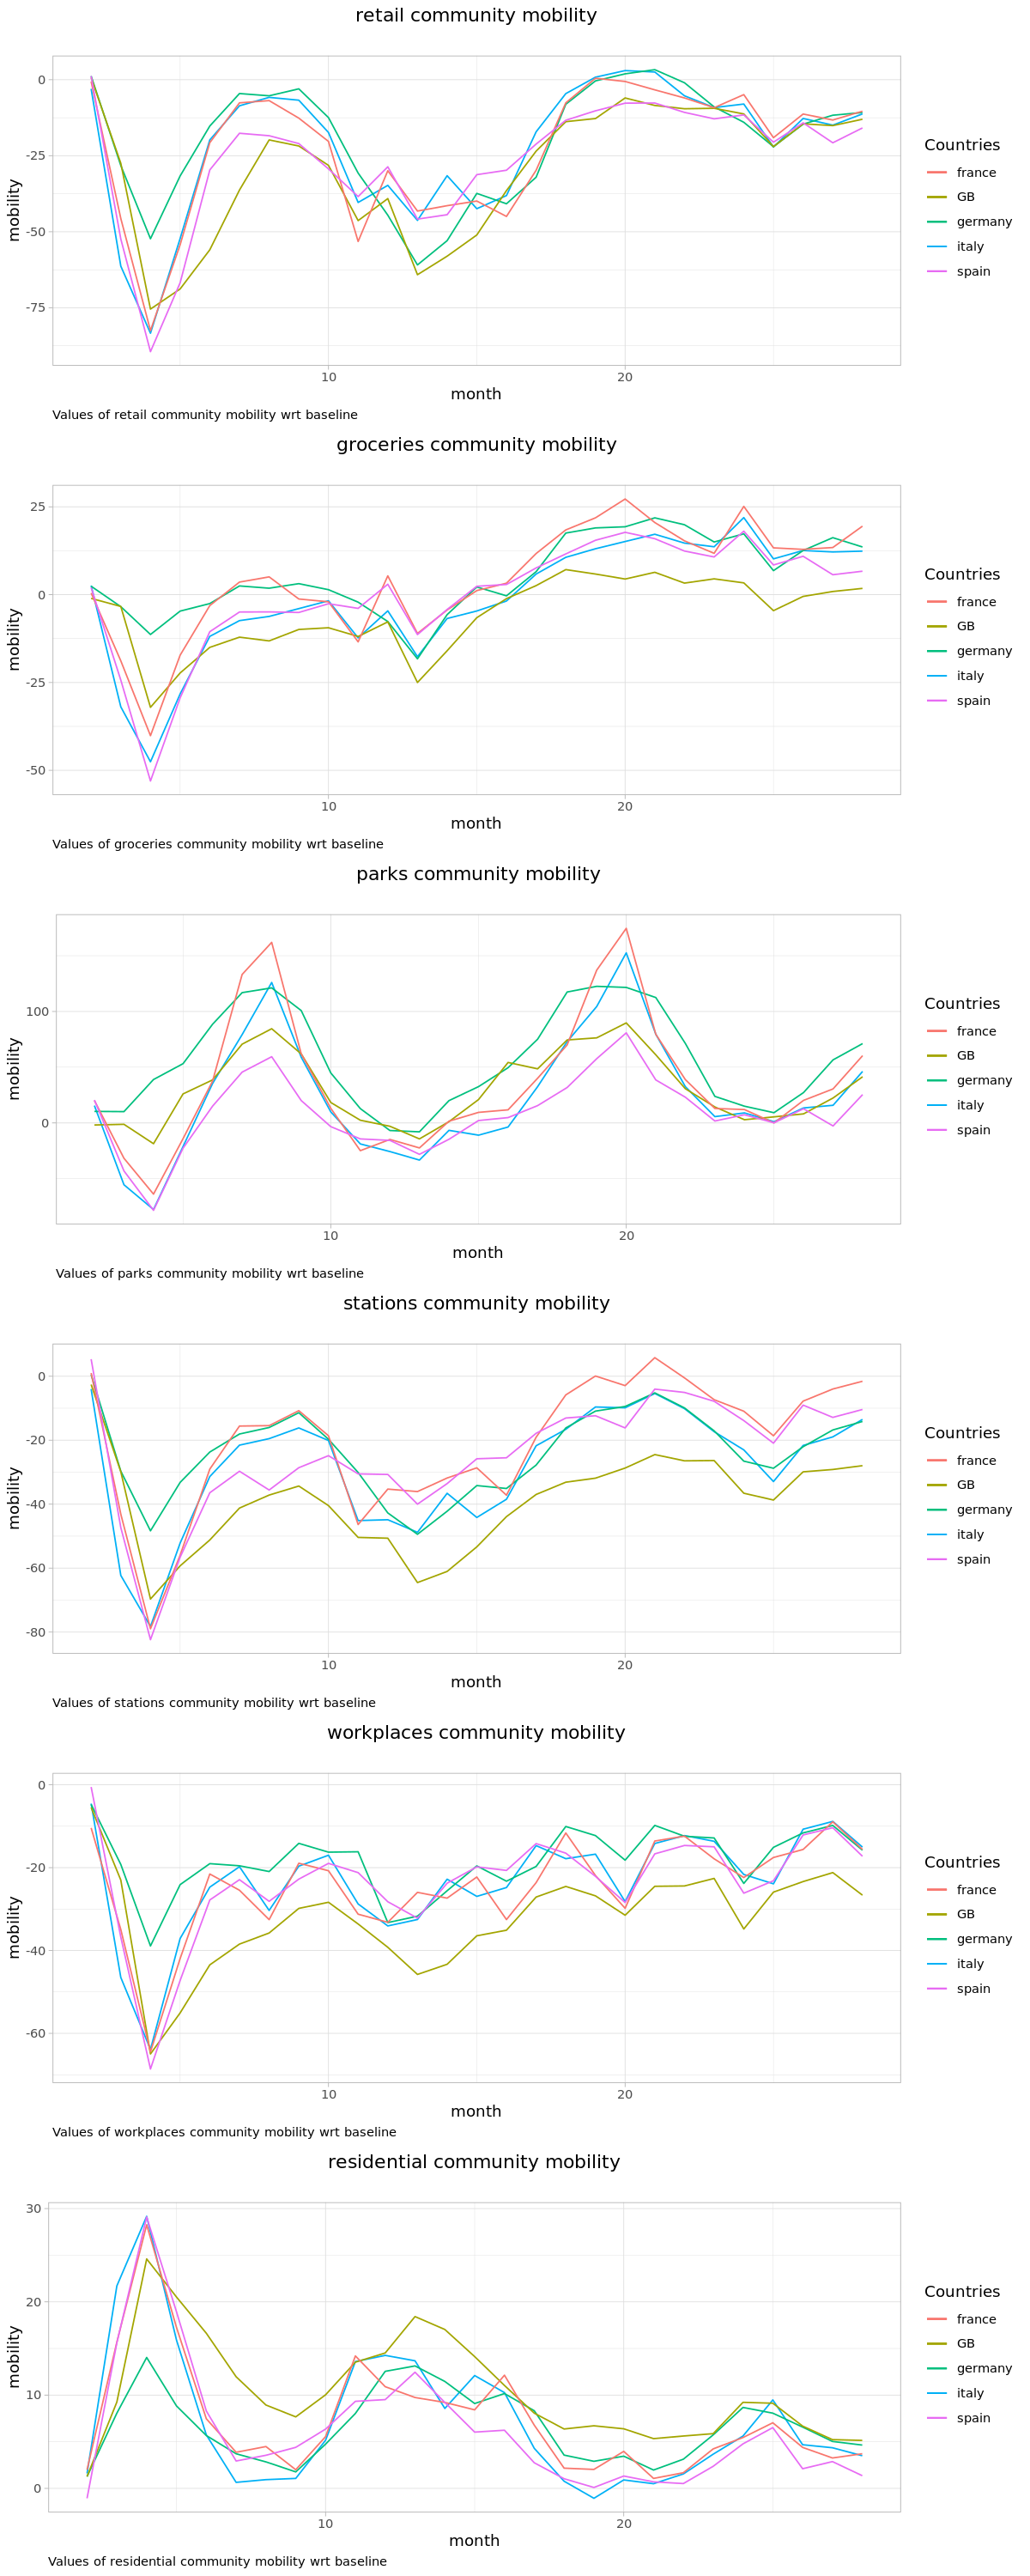

In [ ]:
country_dataset <- list(italy_mobility, germany_mobility, spain_mobility, austria_mobility, greece_mobility)
fig(10,25)
retail_plot <- plot_(time_granularity = "month", category = "retail")
groceries_plot <- plot_(time_granularity = "month", category = "groceries")
parks_plot <- plot_(time_granularity = "month", category = "parks")
stations_plot <- plot_(time_granularity = "month", category = "stations")
workplaces_plot <- plot_(time_granularity = "month", category = "workplaces")
residential_plot <- plot_(time_granularity = "month", category = "residential")
grid.arrange(retail_plot, groceries_plot, parks_plot, stations_plot, workplaces_plot, residential_plot, ncol = 1, nrow = 6)


### Exercise 2 - Random number generators
    One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.
    Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.
    
    Suggestion: after having squared the number, convert it to a list of characters (number <- unlist(strsplit(as.character(x.squared),""))) and, after having removed the head and tail of the list, convert it back to a number (as.numeric(paste(number.after.trimming, collapse=""))).

In [ ]:
# The single generator receives in input a number and a desired number of digits for the output (this 
    #is necessary for when we iterate the process, where the digits of the input number may be less than 
    #the desired number of digits for the output (for example due to the presence of 0s as first digits
    #of a generated number)
    
single_generator <- function(x, desired_digits){
    original_digits <- desired_digits
    #Here the number of digits of distance frrom the middle digit are computed
    add_tail <- ceiling((original_digits -1) / 2)
    add_head <- floor((original_digits -1) / 2)
    #I use format to avoid scientific notation: otherwise the string will contain characters too
    square_split <- unlist(strsplit(as.character(format(x^2, scientific = FALSE)),""))
    #Then square, get the index of the digit in the middle
    square_digit_number <- length(square_split)
    ifelse(square_digit_number %% 2 == 0, even_digit_number <- square_digit_number / 2, even_digit_number <- (square_digit_number - 1) / 2)
    tail <- even_digit_number + add_tail
    head <- even_digit_number - add_head
    #If there are not enough digits return 0
    if(even_digit_number < add_head) {
        return(0)
        }
    #Select the digits around the middle using add_tail/head
    pruned_square_split <- square_split[head:tail]
    output <- as.numeric(paste(pruned_square_split, collapse = ""))
    return(output)
} 

#The multi_generator receives the in input a starting number and the number of iterations desired. It
    #uses the length of that number as desired number of digits in the single_generator. It iterates
    #iterates the single generator as long as asked with iteration number.
multi_generator <- function(start, iterations) {
    #Extract the desired number of digits
    split <- unlist(strsplit(as.character(format(start, scientific = FALSE)),""))
    desired_digits <- length(split)
    #Define places to store all the valid/invalid outputs of the algorithm.
    #Same thing for the iteration number of the invalid outputs (when we only care about generating numbers,
        #and not analizing patterns etc, we are only interested in valid_seq)
    valid_seq <- c()
    error_seq <- c()
    error_index <- c()
    #Iterates the single_generator
    for (i in 1:iterations) {
        #Compute the new number
        start = single_generator(start, desired_digits)
        if(start < 10^(desired_digits - 1)) {
            #Check if it is has the correct number of digits (<=> doesn't start with zero)
            if(start==0) {
                #If it is exactly 0 the algorithm fails, it has no way to generate a new number
                #Alerts in case of null output: failure of the algorithm
                cat("error at iteration number:\t", i, "\n")
                break
            } else {
                #If it starts with 0 but is not null, the algorithm discards it, but will still use it
                    #to generate a following number
                error_seq <- c(error_seq, start)
                error_index <- c(error_seq, i)
            }
        } else {
            #If the number has the correct length, it is stored in valid_seq
            valid_seq <- c(valid_seq, start)
        }
    }
    #Prints number of valid/invalid outputs. Since we are in base 10, the ratio in case of optimal
        #conditions is expected to be 9/1
    cat("number of invalid outputs:\t", length(error_seq), "\n")
    cat("number of valid outputs:\t", length(valid_seq), "\n")
    return(valid_seq)
}



In [ ]:
#Example of the single_generator
format(single_generator(7674629056, 10), scientific = FALSE)

[1] "9311471994"

In [ ]:
#Example pf the multi_generator
format(multi_generator(7674629056, 5), scientific = FALSE)

number of invalid outputs:	 0 
number of valid outputs:	 5 


[1] "9311471994" "5106950463" "9430315359" "8477701912" "4297087284"

In case of small number of digits the algorithm doesn't work well. A list of examples follows.

number of invalid outputs:	 1046 
number of valid outputs:	 8954 


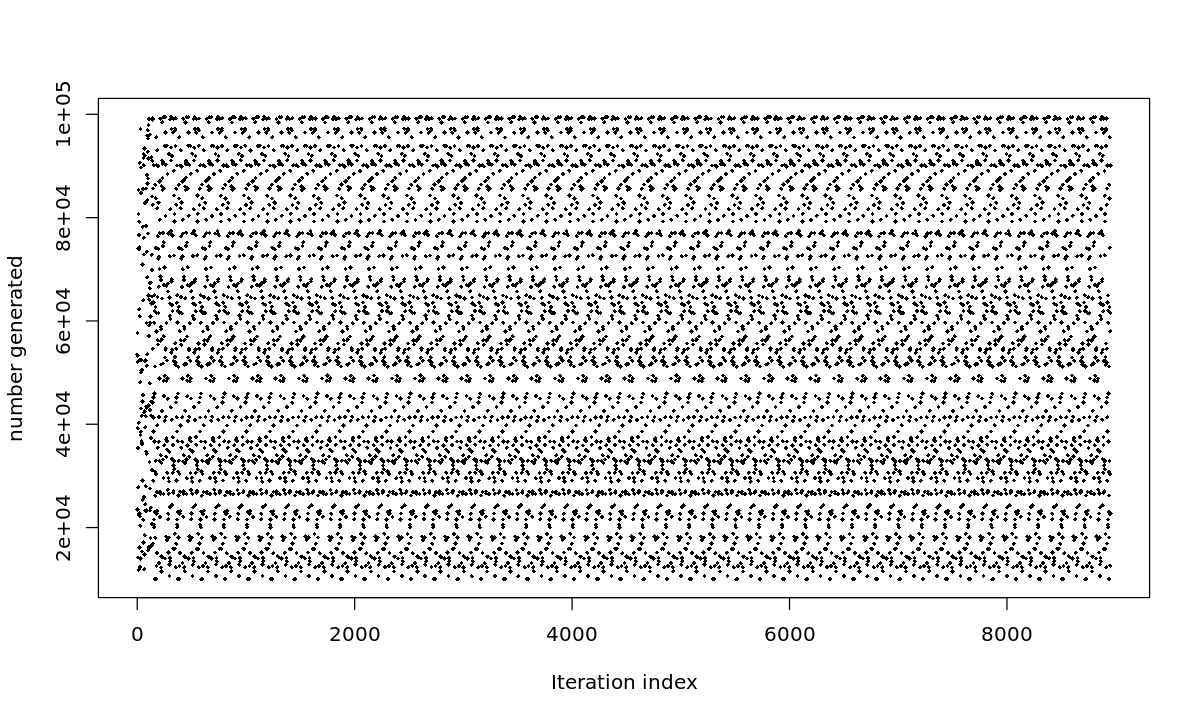

In [ ]:
#In this case the number appear not to be even remotely random: there evident repetitive patterns in the plot
start <- 29214
iterations <- 10^4
valid_seq <- multi_generator(start, iterations)

fig(10, 6)
plot(c(1:length(valid_seq)), valid_seq, xlab = "Iteration index", ylab = "number generated", col = 1, pch = 18, cex = 0.5)

number of invalid outputs:	 54 
number of valid outputs:	 9946 


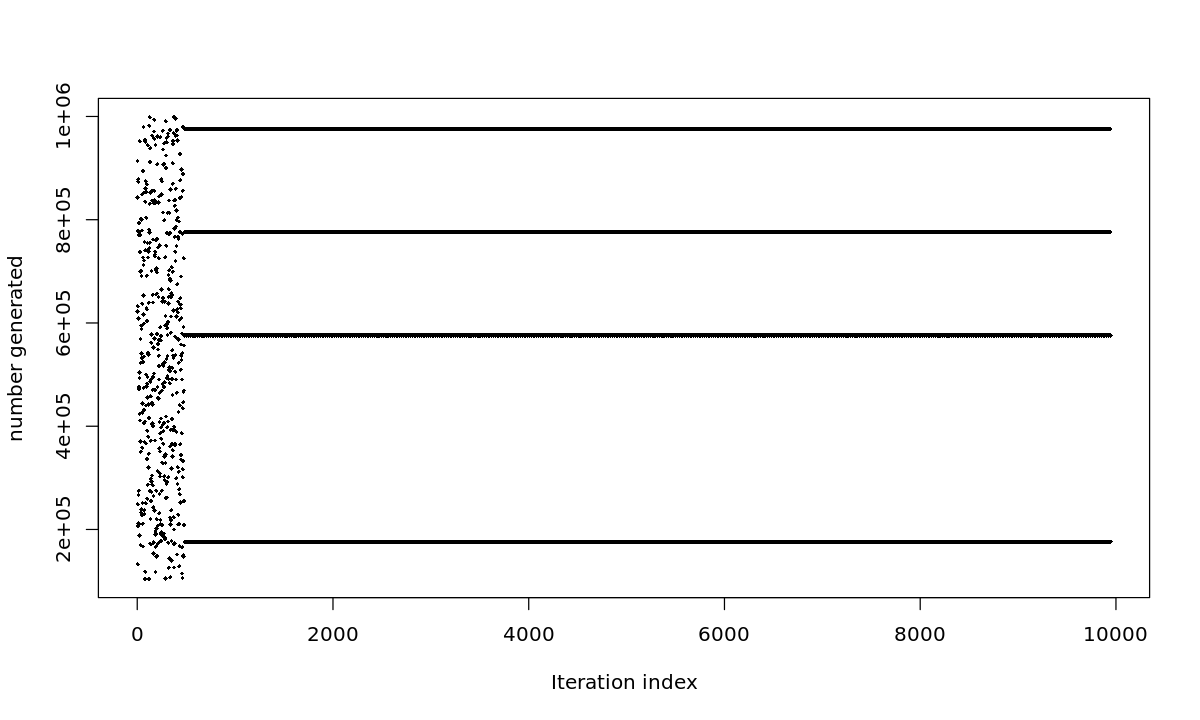

In [ ]:
#Some other times, the algorithm gets stuck in very small loops
start <- 192365
iterations <- 10^4
valid_seq <- multi_generator(start, iterations)

fig(10, 6)
plot(c(1:length(valid_seq)), valid_seq, xlab = "Iteration index", ylab = "number generated", col = 1, pch = 18, cex = 0.5)

In [ ]:
#Here we see the data of the previous plot
valid_seq[9900:10000]

format(multi_generator(576000, 10), scientific = FALSE)

[1] 576000 776000 176000 976000 576000 776000 176000 976000 576000 776000
 [11] 176000 976000 576000 776000 176000 976000 576000 776000 176000 976000
 [21] 576000 776000 176000 976000 576000 776000 176000 976000 576000 776000
 [31] 176000 976000 576000 776000 176000 976000 576000 776000 176000 976000
 [41] 576000 776000 176000 976000 576000 776000 176000     NA     NA     NA
 [51]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
 [61]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
 [71]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
 [81]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
 [91]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
[101]     NA

number of invalid outputs:	 0 
number of valid outputs:	 10 


[1] "776000" "176000" "976000" "576000" "776000" "176000" "976000" "576000"
 [9] "776000" "176000"

On the other other hand, when generating slightly bigger numbers, the performance of the algorithm is really superior, generating pseudorandom outputs. For this reason, a better way to generate random small numbers, would be to use the algorithm on a bigger number, and then truncate all the valid outputs to the desired number of digits.
We see below that for 10 digits numbers, the algorithm works pretty fine, generating a valid output 90% of the times.

number of invalid outputs:	 991 
number of valid outputs:	 9009 


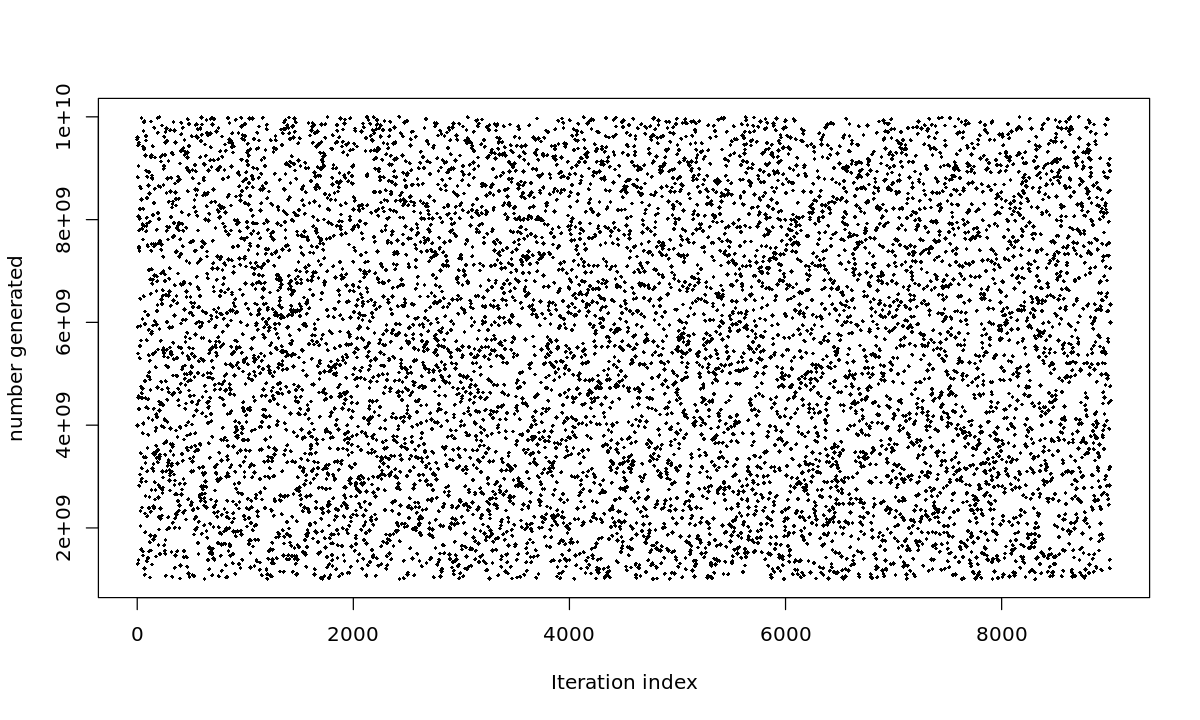

In [ ]:
start <- 2921464799
iterations <- 10^4
valid_seq <- multi_generator(start, iterations)

fig(10, 6)
plot(c(1:length(valid_seq)), valid_seq, xlab = "Iteration index", ylab = "number generated", col = 1, pch = 18, cex = 0.5)

### Exercise 3 - Bayesian Inference
    A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.
    
    a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the yournal ?
    b) Assuming a uniform prior, what is the posterior distribution for y ?
    c) Plot both posterior and likelihood ditributions functions

a) Since no kind of information is given, I would assume a uniform prior.


b) Assuming a uniform prior, the posterior distribution is proportional to the likelihood (binomial), so it will be a binomial distribution:

$$P(y|p,n,M) \propto p^r (1-p)^{n-r} $$\
with $n = 150$, $r = 29$.


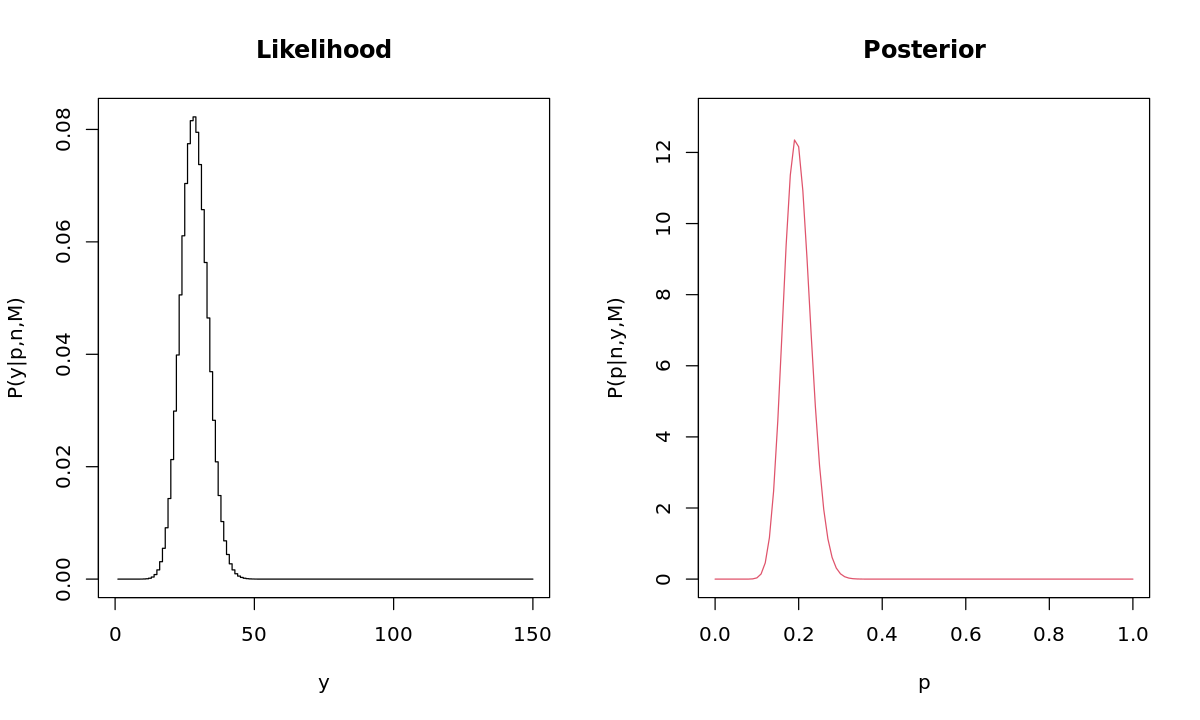

In [7]:
#Fix parameters
n <- 150
r <- 29
p <- r/n 
#The likelihood is binomial, the prior, uniform, has no impact on it. It is used to compute the notìrmalization factor
evid <- integrate(function(x) dbinom(29, 150, x), lower = 0, upper = 1)$value

fig(10, 6)
par(mfrow=c(1,2))
plot(1:150, dbinom(1:150, 150, p), "S", col = 1, xlab='y', ylab='P(y|p,n,M)', main="Likelihood", xlim = c(0, 150))
plot(0, 0, "n", xlim=c(0,1), ylim=c(0,13), xlab='p', ylab='P(p|n,y,M)', main="Posterior")
curve(dbinom(29, 150, x) / evid, from=0, to=1, col = 2, add=TRUE) 




### Exercise 4 - Bayesian Inference
    A coin is flipped n = 30 times with the following outcomes: T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H.
    
    a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.
    b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.
    c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).
    d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

a)

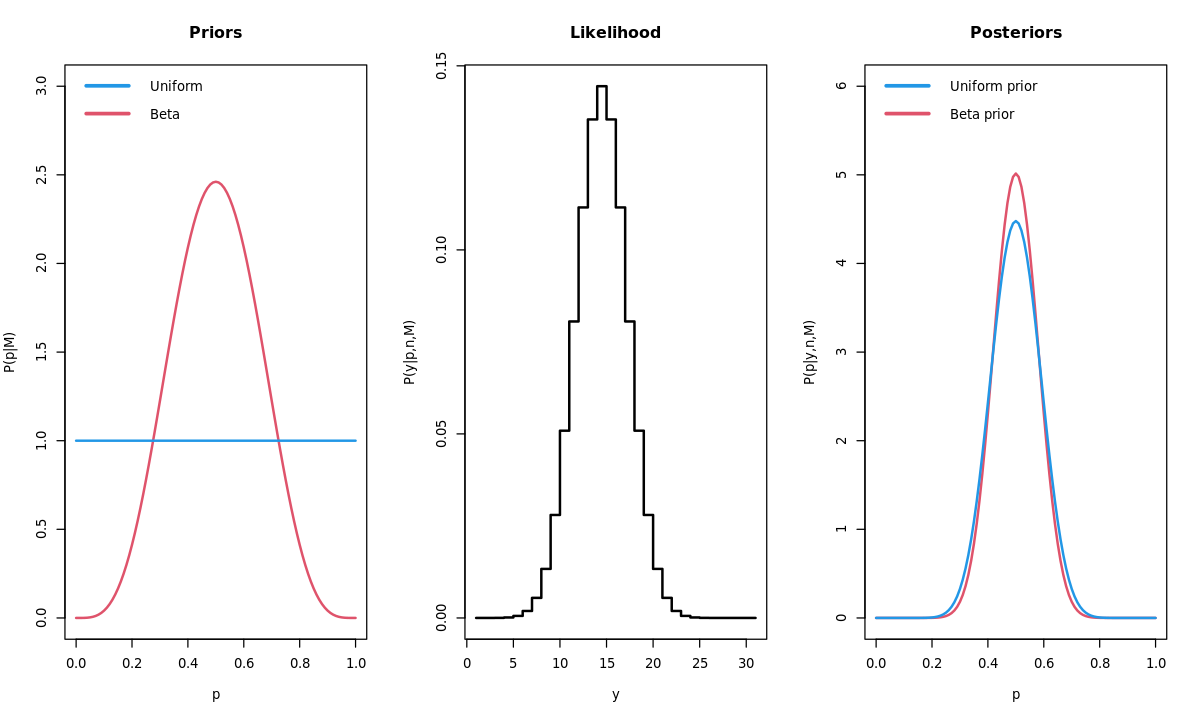

In [11]:
#Toss results
toss_results = c(T, T, T, T, T, F, T, T, F, F, T, T, F, F, F, T, F, T, F, T, F, F, T, F, T, F, T, F, F, F)
#Choose simmetric prior, also the uniform is a beta(1,1).
beta_prior_a <- 5 
beta_prior_b <- 5
fig(10,6)
par(mfrow=c(1,3))
plot(0, 0, "n", xlim = c(0, 1), ylim = c(0, 3), main = "Priors", xlab = "p", ylab = "P(p|M)")
curve(dbeta(x, beta_prior_a, beta_prior_b), col = 2, lwd = 2, lty = 1, add = TRUE) 
curve(dbeta(x, 1, 1), col = 4, lwd = 2, lty = 1, add = TRUE)
legend("topleft", legend = c("Uniform", "Beta"), bty = "n", lty = c(1,1), lwd = c(3,3), col = c(4, 2), y.intersp = 2)
#The likelihood is binomial
n <- length(toss_results)
h <- length(toss_results[toss_results == F])
pt <- seq(0:length(toss_results))
p <- h/n
plot(pt, dbinom(pt, length(toss_results), p), "S", col = 1, lwd = 2, xlab = 'y', ylab = 'P(y|p,n,M)', main = "Likelihood")
#Update the betas is simple since the priors are betas as well
beta_posterior <- function(x) {
    uniform_posterior <- dbeta(x, beta_prior_a + h, beta_prior_b + n - h)
    return(uniform_posterior)
}
uniform_posterior <- function(x) {
    uniform_posterior <- dbeta(x, 1 + h, 1 + n - h)
    return(uniform_posterior)
}
plot(0, 0, "n", xlim = c(0, 1), ylim = c(0, 6), main = "Posteriors", xlab = "p", ylab = "P(p|y,n,M)")
curve(beta_posterior(x), col = 2, lwd = 2, lty = 1, add = TRUE)
curve(uniform_posterior(x), col = 4, lwd = 2, lty = 1, add = TRUE)
legend("topleft", legend = c("Uniform prior", "Beta prior"), lty = c(1, 1), bty = "n", lwd = c(3, 3), col = c(4, 2), y.intersp = 2)

b)

[1] "The most probable values for p are 0.50 for the uniform prior, 0.50 for the beta prior"

[1] "The credibility intervals at 95% are [0.33,0.67] for the posterior generated with the uniform prior, [0.35, 0.65] for the one with the beta prior"

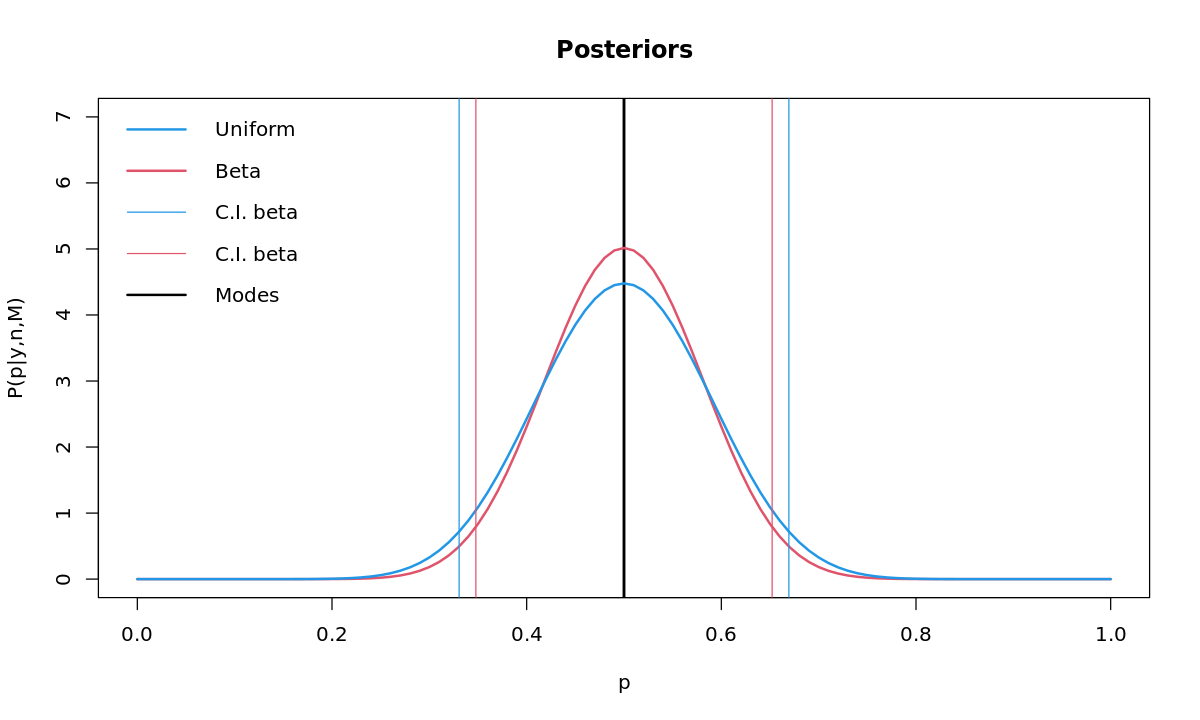

In [12]:
#Expected values as modes instead of means, it is in general more accurate
mode_beta <- optimize(beta_posterior, interval = c(0, 1), maximum = TRUE)$maximum
mode_uniform <- optimize(uniform_posterior, interval = c(0, 1), maximum = TRUE)$maximum
#C.I. computed simmetrically around the expected value.
border_ci <- function(func, mid, ci, ...) {
    res <- uniroot(function(r) integrate(func, max(mid - r, 0), min(mid + r, 1), ...)[["value"]] - ci, interval = c(0, 1))$root
    return(res)
}
border_beta <- border_ci(beta_posterior, mode_beta, 0.95)
border_uniform <- border_ci(uniform_posterior, mode_uniform, 0.95)

sprintf("The most probable values for p are %.2f for the uniform prior, %.2f for the beta prior", mode_uniform, mode_beta)
sprintf("The credibility intervals at 95%% are [%.2f,%.2f] for the posterior generated with the uniform prior, [%.2f, %.2f] for the one with the beta prior", mode_uniform - border_uniform, mode_uniform + border_uniform, mode_beta - border_beta, mode_beta + border_beta)
fig(10,6)
plot(0, 0, "n", xlim = c(0, 1), ylim = c(0, 7), main = "Posteriors", xlab = "p", ylab = "P(p|y,n,M)")
abline(v = c(mode_uniform, mode_beta), col = c(1, 1), lty = 1, lwd = 2)
curve(beta_posterior(x), col = 2, lwd = 2, lty = 1, add = TRUE)
curve(uniform_posterior(x), col = 4, lwd = 2, lty = 1, add = TRUE)
pt_beta = seq(from = mode_beta - border_beta, to = mode_beta + border_beta, length.out = 30) 
pt_uniform = seq(from = mode_uniform - border_uniform, to = mode_uniform + border_uniform, length.out = 30) 
abline(v = c(mode_beta - border_beta, mode_beta + border_beta), col = 2, lty = 1)
abline(v = c(mode_uniform - border_uniform, mode_uniform + border_uniform), col = 4, lty = 1)
legend("topleft", legend=c("Uniform", "Beta", "C.I. beta", "C.I. beta", "Modes"), bty = "n", lty = c(1, 1, 1, 1, 1), lwd = c(2, 2, 1, 1, 2), col=c(4, 2, 4, 2, 1), y.intersp = 2)

c)

In [13]:
cumulative_heads <- 1:30
for (i in 1:length(toss_results)) {
    cumulative_heads[i] <- length(toss_results[1:i][toss_results[1:i] == F])
}
modes_beta <- c(1:30)
ci_left_beta <- c(1:30)
ci_right_beta <- c(1:30)
modes_uniform <- c(1:30)
ci_left_uniform <- c(1:30)
ci_right_uniform <- c(1:30)

current_posterior <- function(x, n_toss, alpha_start, beta_start) {
    current_posterior <- dbeta(x, alpha_start + cumulative_heads[n_toss], beta_start + n_toss - cumulative_heads[n_toss])
    return(current_posterior)
}

for (i in 1:30) {
    mode_beta <- optimize(current_posterior, interval = c(0, 1), n_toss = i, alpha_start = beta_prior_a, beta_start = beta_prior_b, maximum = TRUE)$maximum
    ci_border_beta <- border_ci(current_posterior, mode_beta, 0.95, n_toss = i, alpha_start = beta_prior_a, beta_start = beta_prior_b)
    modes_beta[i] <- mode_beta
    ci_left_beta[i] <- max(mode_beta - ci_border_beta, 0)
    ci_right_beta[i] <- min(mode_beta + ci_border_beta, 1)

    mode_uniform <- optimize(current_posterior, interval = c(0, 1), n_toss = i, alpha_start = 1, beta_start = 1, maximum = TRUE)$maximum
    ci_border_uniform <- border_ci(current_posterior, mode_uniform, 0.95, n_toss = i, alpha_start = 1, beta_start = 1)
    modes_uniform[i] <- mode_uniform
    ci_left_uniform[i] <- max(mode_uniform - ci_border_uniform, 0)
    ci_right_uniform[i] <- min(mode_uniform + ci_border_uniform, 1)
}

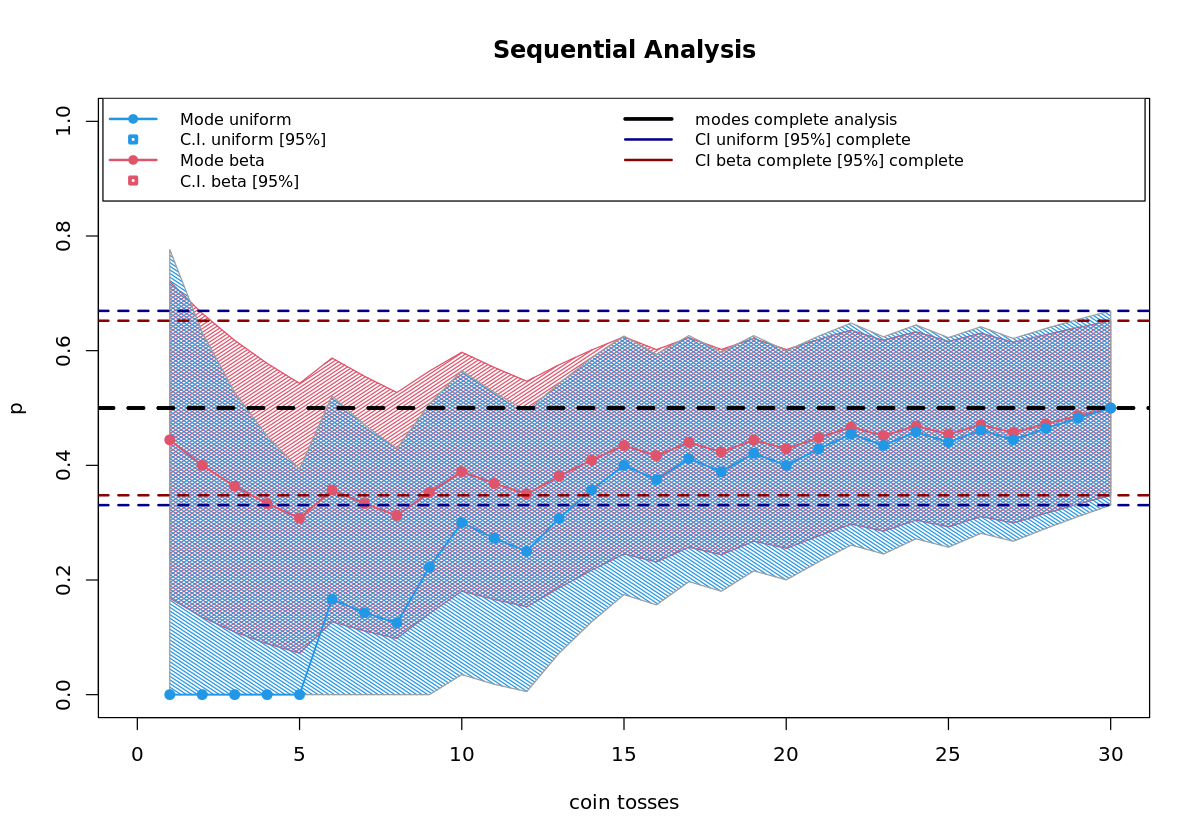

In [17]:
fig(10, 7)
plot(0,0, "n", xlim = c(0,30), ylim = c(0,1), main = "Sequential Analysis", xlab = "coin tosses", ylab = "p")
polygon( c(1:30, 30:1), c(ci_right_beta, rev(ci_left_beta)), density = 50, angle = 45, col=2, border=2)
polygon( c(1:30, 30:1), c(ci_right_uniform, rev(ci_left_uniform)), density = 50, angle = 135, col=4, border=5000)
lines(1:30, modes_beta, "o", ylim=c(0,1), lwd=1.5, col=2, pch=19)
lines(1:30, modes_uniform, "o", ylim=c(0,1), lwd=1.5, col=4, pch=19)
abline(h = c(mode_uniform, mode_beta), col = c(1, 1), lty = 2, lwd = 3)
abline(h = c(mode_beta - border_beta, mode_beta + border_beta), col = "darkred", lty = 2, lwd = 2)
abline(h = c(mode_uniform - border_uniform, mode_uniform + border_uniform), col = "darkblue", lty = 2, lwd = 2)
legend("top", 
        c("Mode uniform", "C.I. uniform [95%]", "Mode beta", "C.I. beta [95%]", "modes complete analysis", "CI uniform [95%] complete", "CI beta complete [95%] complete"),
        col=c(4, 4, 2, 2, 1, "darkblue", "darkred"), ncol = 2, lwd=c(2, 3, 2, 3, 3, 2, 2),
        lty=c(1, NA, 1, NA, 1, 1, 1), pch=c(19, 22, 19, 22, NA, NA, NA), y.intersp=1, cex=.8)

d)The final result is the same, however it interesting to see how the impact of the prior decreases as the number of tosses augments.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d5bb945-0fa7-4ff7-92d1-b38873b5c6ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>